## Import Libraries

In [1]:
import pandas as pd
import numpy as np

## Loading the data and selecting the features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_tst = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 324)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 324)

In [8]:
loan_data_targets_tst.shape

(93257, 1)

### Selecting the features

In [9]:
inputs_train_ref_cat = loan_data_inputs_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vac',
'purpose:maj_pur__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<3',
'months_since_issue_d:3-8',
'months_since_issue_d:8-13',
'months_since_issue_d:13-18',
'months_since_issue_d:18-25',
'months_since_issue_d:25-31',
'months_since_issue_d:31-36',
'months_since_issue_d:36-64',
'months_since_issue_d:>64',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'months_since_issue_d:>64',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
# selecting all the dummies except the reference categories to be the relevant dummies
inputs_train = inputs_train_ref_cat.drop(ref_categories, axis = 1)
inputs_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
365838,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
131932,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
146867,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## PD Model Estimation

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()

In [14]:
pd.options.display.max_rows = None

In [15]:
# model will be estimated by fitting the inputs on the targets
reg.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [16]:
reg.intercept_

array([-0.71600759])

In [17]:
reg.coef_

array([[ 5.06339431e-01,  4.63202046e-01,  3.70595414e-01,
         3.20355904e-01,  2.68165309e-01,  1.07395600e-01,
         1.03210362e-01,  1.04114996e-01,  3.11364408e-02,
         5.50894393e-02,  5.47786838e-02,  5.20850712e-02,
         7.35035172e-02,  1.34301051e-01,  9.05000541e-02,
         1.77162501e-01,  2.41307240e-01,  2.23774309e-01,
         2.62096860e-01,  3.23248087e-01,  5.10052848e-01,
         1.25243105e-01,  6.89928281e-02,  2.95912893e-01,
         2.08618420e-01,  2.22810245e-01,  2.66395503e-01,
         1.35162424e-01,  4.69315051e-02,  8.36868886e-02,
         1.06987593e-01,  5.49395211e-02,  4.14185348e-02,
         1.06677108e-01, -4.08396500e-01, -5.18601844e-01,
        -6.10792983e-01, -5.75634299e-01, -5.63986249e-01,
        -6.25451799e-01, -4.24081744e-01, -5.81136901e-01,
         1.53679467e+00,  9.90874162e-01,  6.61367253e-01,
         2.74031704e-01,  3.40046911e-02, -2.24227402e-03,
         3.13951783e-02,  7.06222373e-02,  7.51048238e-0

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',  reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.716008
1,grade:A,0.506339
2,grade:B,0.463202
3,grade:C,0.370595
4,grade:D,0.320356
5,grade:E,0.268165
6,grade:F,0.107396
7,home_ownership:OWN,0.103210
8,home_ownership:MORTGAGE,0.104115
9,addr_state:NM_VA,0.031136


### Build a Logistic Regression Model with p-values

In [20]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_p_val:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
        
    def fit(self, X, y):
        self.model.fit(X, y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_p_val()

In [22]:
reg.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',  reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.716008
1,grade:A,0.506339
2,grade:B,0.463202
3,grade:C,0.370595
4,grade:D,0.320356
5,grade:E,0.268165
6,grade:F,0.107396
7,home_ownership:OWN,0.103210
8,home_ownership:MORTGAGE,0.104115
9,addr_state:NM_VA,0.031136


In [24]:
p_values = reg.p_values

In [25]:
p_values = np.append(np.nan, np.array(p_values))

In [26]:
summary_table['p_values'] = p_values

In [27]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.716008,NaN
1,grade:A,0.506339,9.758737e-09
2,grade:B,0.463202,1.135965e-14
3,grade:C,0.370595,3.304000e-11
4,grade:D,0.320356,1.993862e-09
5,grade:E,0.268165,2.185333e-08
6,grade:F,0.107396,3.151602e-02
7,home_ownership:OWN,0.103210,2.953948e-07
8,home_ownership:MORTGAGE,0.104115,1.998990e-16
9,addr_state:NM_VA,0.031136,3.307282e-01


In [28]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not tatistically significant.

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vac',
'purpose:maj_pur__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<3',
'months_since_issue_d:3-8',
'months_since_issue_d:8-13',
'months_since_issue_d:13-18',
'months_since_issue_d:18-25',
'months_since_issue_d:25-31',
'months_since_issue_d:31-36',
'months_since_issue_d:36-64',
'months_since_issue_d:>64',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [29]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'months_since_issue_d:>64',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [30]:
# selecting all the dummies except the reference categories to be the relevant dummies
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
reg2 = LogisticRegression_p_val()
reg2.fit(inputs_train, loan_data_targets_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
feature_name = inputs_train.columns.values

In [33]:
summary_table = pd.DataFrame(columns = ['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',  reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.666899
1,grade:A,0.498180
2,grade:B,0.454111
3,grade:C,0.361663
4,grade:D,0.312780
5,grade:E,0.262094
6,grade:F,0.102658
7,home_ownership:OWN,0.103586
8,home_ownership:MORTGAGE,0.101458
9,addr_state:NM_VA,0.034084


In [34]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.666899,NaN
1,grade:A,0.498180,1.552825e-08
2,grade:B,0.454111,2.735461e-14
3,grade:C,0.361663,6.998933e-11
4,grade:D,0.312780,3.312991e-09
5,grade:E,0.262094,2.481485e-08
6,grade:F,0.102658,3.568350e-02
7,home_ownership:OWN,0.103586,2.649516e-07
8,home_ownership:MORTGAGE,0.101458,9.501588e-16
9,addr_state:NM_VA,0.034084,2.865841e-01


In [35]:
import pickle

In [36]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

## PD Model Validation (Test)

### Out of sample validation test 

In [37]:
inputs_test_ref_cat = loan_data_inputs_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vac',
'purpose:maj_pur__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'months_since_issue_d:<3',
'months_since_issue_d:3-8',
'months_since_issue_d:8-13',
'months_since_issue_d:13-18',
'months_since_issue_d:18-25',
'months_since_issue_d:25-31',
'months_since_issue_d:31-36',
'months_since_issue_d:36-64',
'months_since_issue_d:>64',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [38]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:sm_b__educ__mov__hou__ren_en__wedd',
'initial_list_status:f',
'term:60',
'emp_length_int:0',
'months_since_issue_d:>64',
'int_rate:20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [39]:
inputs_test = inputs_test_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [40]:
# now model will be used to estimate probability of default of each observation
y_hat_test = reg2.model.predict(inputs_test)

In [41]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [43]:
y_hat_test_proba
# [PD, 1-PD]

array([[0.09669197, 0.90330803],
       [0.1906239 , 0.8093761 ],
       [0.10985013, 0.89014987],
       ...,
       [0.02237301, 0.97762699],
       [0.03871093, 0.96128907],
       [0.03427148, 0.96572852]])

In [44]:
y_hat_test_proba[: ][:, 1]

array([0.90330803, 0.8093761 , 0.89014987, ..., 0.97762699, 0.96128907,
       0.96572852])

In [45]:
# contains the probability of being a good borrower
y_hat_test_proba = y_hat_test_proba[:][:, 1]

In [46]:
loan_data_targets_tst_temp = loan_data_targets_tst

In [47]:
loan_data_targets_tst_temp.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [48]:
loan_data_targets_tst_temp.reset_index(drop = True, inplace = True)

In [49]:
df_pred_probs = pd.concat([loan_data_targets_tst_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [50]:
df_pred_probs.shape

(93257, 2)

In [51]:
df_pred_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [52]:
df_pred_probs.index = loan_data_inputs_test.index

In [53]:
df_pred_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.903308
288564,1,0.809376
213591,1,0.890150
263083,1,0.916920
165001,1,0.977841


### Accuracy and Area under the curve

In [54]:
# deciding on a threshold temporarily
threshold = 0.9 #0.5
df_pred_probs['proba_>_threshold'] = np.where((df_pred_probs['y_hat_test_proba'] > threshold), 1, 0)
# we can see that under a threshold of 0.5 a lot of false positives are generated

In [55]:
pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7354,2836
1,36276,46791


In [56]:
pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted']) / df_pred_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078857,0.030411
1,0.388990,0.501742


In [57]:
(pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted']) / df_pred_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted']) / df_pred_probs.shape[0]).iloc[1, 1]

0.5805998477326099

In [58]:
# Generating the receiver operating characteristic curve (ROC) to find the dicrimination threshold
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
roc_curve(df_pred_probs['loan_data_targets_test'], df_pred_probs['y_hat_test_proba'])
# Three arrays = false positive rate, true positive rate, thresholds with tpr as a function of fpr

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 6.74154598e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.98934401, 0.98934401, 0.98653415, ..., 0.40598316, 0.37188173,
        0.35747919]))

In [60]:
false_p_rt, true_p_rt, thresholds = roc_curve(df_pred_probs['loan_data_targets_test'], df_pred_probs['y_hat_test_proba'])

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

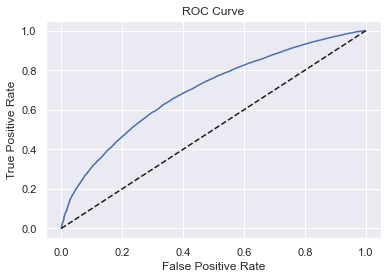

In [62]:
plt.plot(false_p_rt, true_p_rt)
plt.plot(false_p_rt, false_p_rt, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [63]:
auroc = roc_auc_score(df_pred_probs['loan_data_targets_test'], df_pred_probs['y_hat_test_proba'])
auroc

0.6963070135056448

### Gini Coeff and Kolmogorov-Smirnov Coeff

In [64]:
df_pred_probs = df_pred_probs.sort_values('y_hat_test_proba')

In [65]:
df_pred_probs.head()

,loan_data_targets_test,y_hat_test_proba,proba_>_threshold
42341,1,0.357479,0
39810,0,0.371882,0
42344,1,0.405983,0
40173,0,0.418905,0
40518,0,0.452682,0


In [66]:
df_pred_probs.tail()

,loan_data_targets_test,y_hat_test_proba,proba_>_threshold
306808,1,0.988532,1
300940,1,0.988604,1
148031,1,0.988760,1
332098,1,0.988881,1
242624,1,0.989344,1


In [67]:
df_pred_probs = df_pred_probs.reset_index()
df_pred_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,proba_>_threshold
0,42341,1,0.357479,0
1,39810,0,0.371882,0
2,42344,1,0.405983,0
3,40173,0,0.418905,0
4,40518,0,0.452682,0


In [68]:
df_pred_probs['Cumulative Population'] = df_pred_probs.index + 1

In [69]:
df_pred_probs['Cumulative N Good'] = df_pred_probs['loan_data_targets_test'].cumsum()
df_pred_probs['Cumulative N Bad'] = df_pred_probs['Cumulative Population'] - df_pred_probs['loan_data_targets_test'].cumsum()

In [70]:
df_pred_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,proba_>_threshold,Cumulative Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.357479,0,1,1,0
1,39810,0,0.371882,0,2,1,1
2,42344,1,0.405983,0,3,2,1
3,40173,0,0.418905,0,4,2,2
4,40518,0,0.452682,0,5,2,3


In [71]:
df_pred_probs['Cumulative Perc Population'] = df_pred_probs['Cumulative Population'] / (df_pred_probs.shape[0])
df_pred_probs['Cumulative Perc Good'] = df_pred_probs['Cumulative N Good'] / df_pred_probs['loan_data_targets_test'].sum()
df_pred_probs['Cumulative Perc Bad'] = df_pred_probs['Cumulative N Bad'] / (df_pred_probs.shape[0] - df_pred_probs['loan_data_targets_test'].sum())

In [72]:
df_pred_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,proba_>_threshold,Cumulative Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.357479,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.371882,0,2,1,1,0.000021,0.000012,0.000098
2,42344,1,0.405983,0,3,2,1,0.000032,0.000024,0.000098
3,40173,0,0.418905,0,4,2,2,0.000043,0.000024,0.000196
4,40518,0,0.452682,0,5,2,3,0.000054,0.000024,0.000294


In [73]:
df_pred_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,proba_>_threshold,Cumulative Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,306808,1,0.988532,1,93253,83063,10190,0.999957,0.999952,1.0
93253,300940,1,0.988604,1,93254,83064,10190,0.999968,0.999964,1.0
93254,148031,1,0.988760,1,93255,83065,10190,0.999979,0.999976,1.0
93255,332098,1,0.988881,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.989344,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini ')

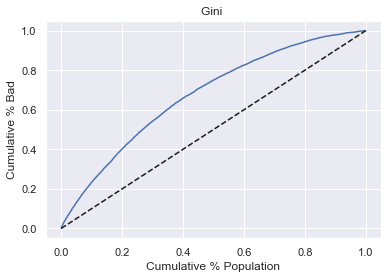

In [74]:
# Gini - plot of cumulative % of bad borrowers vs the cumulative % of all borrowers
plt.plot(df_pred_probs['Cumulative Perc Population'], df_pred_probs['Cumulative Perc Bad'])
plt.plot(df_pred_probs['Cumulative Perc Population'], df_pred_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini ')

In [75]:
# Gini = AUROC * 2 - 1
Gini = auroc * 2 - 1
Gini

0.39261402701128967

Text(0.5, 1.0, 'Kolmorgorov-Smirnov')

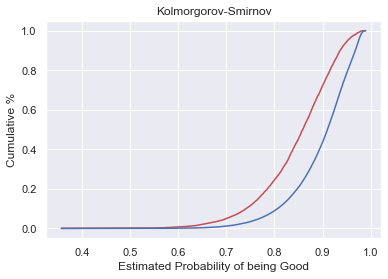

In [76]:
# KS Coeff
# plot the cumulative distribution functions of good and bad borrowers w.r.t. estimated model probability of being a good borrower
plt.plot(df_pred_probs['y_hat_test_proba'], df_pred_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_pred_probs['y_hat_test_proba'], df_pred_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability of being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmorgorov-Smirnov')

In [77]:
KS = max(df_pred_probs['Cumulative Perc Bad'] - df_pred_probs['Cumulative Perc Good'])
KS

0.2906688055693317

This value shows that two cumulative distributions are sufficiently far away from each other and the model has satisfactory predictive power.

## Applying the PD Model
### Calculating PD of individual accounts

In [78]:
pd.options.display.max_columns = None

In [79]:
inputs_test_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [80]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.666899,NaN
1,grade:A,0.498180,1.552825e-08
2,grade:B,0.454111,2.735461e-14
3,grade:C,0.361663,6.998933e-11
4,grade:D,0.312780,3.312991e-09
5,grade:E,0.262094,2.481485e-08
6,grade:F,0.102658,3.568350e-02
7,home_ownership:OWN,0.103586,2.649516e-07
8,home_ownership:MORTGAGE,0.101458,9.501588e-16
9,addr_state:NM_VA,0.034084,2.865841e-01


In [81]:
y_hat_test_proba

array([0.90330803, 0.8093761 , 0.89014987, ..., 0.97762699, 0.96128907,
       0.96572852])

### Creating a Scorecard

In [82]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.666899,NaN
1,grade:A,0.498180,1.552825e-08
2,grade:B,0.454111,2.735461e-14
3,grade:C,0.361663,6.998933e-11
4,grade:D,0.312780,3.312991e-09
5,grade:E,0.262094,2.481485e-08
6,grade:F,0.102658,3.568350e-02
7,home_ownership:OWN,0.103586,2.649516e-07
8,home_ownership:MORTGAGE,0.101458,9.501588e-16
9,addr_state:NM_VA,0.034084,2.865841e-01


In [83]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:sm_b__educ__mov__hou__ren_en__wedd',
 'initial_list_status:f',
 'term:60',
 'emp_length_int:0',
 'months_since_issue_d:>64',
 'int_rate:20.281',
 'months_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [84]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:sm_b__educ__mov__hou__ren_en__wedd,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length_int:0,0,NaN
8,months_since_issue_d:>64,0,NaN
9,int_rate:20.281,0,NaN


In [85]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.666899,NaN
1,1,grade:A,0.498180,1.552825e-08
2,2,grade:B,0.454111,2.735461e-14
3,3,grade:C,0.361663,6.998933e-11
4,4,grade:D,0.312780,3.312991e-09
5,5,grade:E,0.262094,2.481485e-08
6,6,grade:F,0.102658,3.568350e-02
7,7,home_ownership:OWN,0.103586,2.649516e-07
8,8,home_ownership:MORTGAGE,0.101458,9.501588e-16
9,9,addr_state:NM_VA,0.034084,2.865841e-01


In [86]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [87]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.666899,NaN,Intercept
1,1,grade:A,0.498180,1.552825e-08,grade
2,2,grade:B,0.454111,2.735461e-14,grade
3,3,grade:C,0.361663,6.998933e-11,grade
4,4,grade:D,0.312780,3.312991e-09,grade
5,5,grade:E,0.262094,2.481485e-08,grade
6,6,grade:F,0.102658,3.568350e-02,grade
7,7,home_ownership:OWN,0.103586,2.649516e-07,home_ownership
8,8,home_ownership:MORTGAGE,0.101458,9.501588e-16,home_ownership
9,9,addr_state:NM_VA,0.034084,2.865841e-01,addr_state


Let minimum score be 300 and maximum score be 850.

In [88]:
min_score = 300
max_score = 850

In [89]:
# higher coeffs indicate a better borrower. thus the minimum would be falling into all the 'worst' categories
#  and the maximum would be falling into all the 'best categories'
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                       -0.666899
addr_state                       0.000000
annual_inc                      -0.082418
dti                             -0.250029
emp_length_int                   0.000000
grade                            0.000000
home_ownership                   0.000000
initial_list_status              0.000000
inq_last_6mths                   0.000000
int_rate                         0.000000
months_since_earliest_cr_line   -0.003956
months_since_issue_d            -0.623990
mths_since_last_delinq           0.000000
mths_since_last_record           0.000000
purpose                          0.000000
term                             0.000000
total_rev_hi_lim                -0.005152
verification_status              0.000000
Name: Coefficients, dtype: float64

In [90]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.6324434851417682

In [91]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                       -0.666899
addr_state                       0.513492
annual_inc                       0.543861
dti                              0.050243
emp_length_int                   0.108107
grade                            0.498180
home_ownership                   0.103586
initial_list_status              0.135274
inq_last_6mths                   0.752295
int_rate                         1.534389
months_since_earliest_cr_line    0.072629
months_since_issue_d             0.000000
mths_since_last_delinq           0.118881
mths_since_last_record           0.766334
purpose                          0.293975
term                             0.047801
total_rev_hi_lim                 0.230051
verification_status              0.124189
Name: Coefficients, dtype: float64

In [92]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.226388050253426

In [93]:
df_scorecard['Score Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation
0,0,Intercept,-0.666899,NaN,Intercept,-53.477652
1,1,grade:A,0.498180,1.552825e-08,grade,39.948310
2,2,grade:B,0.454111,2.735461e-14,grade,36.414539
3,3,grade:C,0.361663,6.998933e-11,grade,29.001282
4,4,grade:D,0.312780,3.312991e-09,grade,25.081378
5,5,grade:E,0.262094,2.481485e-08,grade,21.016982
6,6,grade:F,0.102658,3.568350e-02,grade,8.232029
7,7,home_ownership:OWN,0.103586,2.649516e-07,home_ownership,8.306428
8,8,home_ownership:MORTGAGE,0.101458,9.501588e-16,home_ownership,8.135750
9,9,addr_state:NM_VA,0.034084,2.865841e-01,addr_state,2.733136


In [94]:
df_scorecard['Score Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation
0,0,Intercept,-0.666899,NaN,Intercept,377.425683
1,1,grade:A,0.498180,1.552825e-08,grade,39.948310
2,2,grade:B,0.454111,2.735461e-14,grade,36.414539
3,3,grade:C,0.361663,6.998933e-11,grade,29.001282
4,4,grade:D,0.312780,3.312991e-09,grade,25.081378
5,5,grade:E,0.262094,2.481485e-08,grade,21.016982
6,6,grade:F,0.102658,3.568350e-02,grade,8.232029
7,7,home_ownership:OWN,0.103586,2.649516e-07,home_ownership,8.306428
8,8,home_ownership:MORTGAGE,0.101458,9.501588e-16,home_ownership,8.135750
9,9,addr_state:NM_VA,0.034084,2.865841e-01,addr_state,2.733136


In [95]:
df_scorecard['Score Preliminary'] = df_scorecard['Score Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary
0,0,Intercept,-0.666899,NaN,Intercept,377.425683,377.0
1,1,grade:A,0.498180,1.552825e-08,grade,39.948310,40.0
2,2,grade:B,0.454111,2.735461e-14,grade,36.414539,36.0
3,3,grade:C,0.361663,6.998933e-11,grade,29.001282,29.0
4,4,grade:D,0.312780,3.312991e-09,grade,25.081378,25.0
5,5,grade:E,0.262094,2.481485e-08,grade,21.016982,21.0
6,6,grade:F,0.102658,3.568350e-02,grade,8.232029,8.0
7,7,home_ownership:OWN,0.103586,2.649516e-07,home_ownership,8.306428,8.0
8,8,home_ownership:MORTGAGE,0.101458,9.501588e-16,home_ownership,8.135750,8.0
9,9,addr_state:NM_VA,0.034084,2.865841e-01,addr_state,2.733136,3.0


In [96]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score Preliminary'].min().sum()
min_sum_score_prel

300.0

In [97]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score Preliminary'].max().sum()
max_sum_score_prel

850.0

if the max score was 851.0, then subtract 1 from the score that was rounded the most by finding the difference.

### Calculating credit score

In [98]:
inputs_test_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [99]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score Calculation,Score Preliminary
0,0,Intercept,-0.666899,NaN,Intercept,377.425683,377.0
1,1,grade:A,0.498180,1.552825e-08,grade,39.948310,40.0
2,2,grade:B,0.454111,2.735461e-14,grade,36.414539,36.0
3,3,grade:C,0.361663,6.998933e-11,grade,29.001282,29.0
4,4,grade:D,0.312780,3.312991e-09,grade,25.081378,25.0
5,5,grade:E,0.262094,2.481485e-08,grade,21.016982,21.0
6,6,grade:F,0.102658,3.568350e-02,grade,8.232029,8.0
7,7,home_ownership:OWN,0.103586,2.649516e-07,home_ownership,8.306428,8.0
8,8,home_ownership:MORTGAGE,0.101458,9.501588e-16,home_ownership,8.135750,8.0
9,9,addr_state:NM_VA,0.034084,2.865841e-01,addr_state,2.733136,3.0


In [100]:
inputs_test_ref_cat_intercept = inputs_test_ref_cat

In [101]:
inputs_test_ref_cat_intercept.insert(0, 'Intercept', 1)
inputs_test_ref_cat_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:sm_b__educ__mov__hou__ren_en__wedd,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vac,purpose:maj_pur__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,months_since_issue_d:<3,months_since_issue_d:3-8,months_since_issue_d:8-13,months_since_issue_d:13-18,months_since_issue_d:18-25,months_since_issue_d:25-31,months_since_issue_d:31-36,months_since_issue_d:36-64,months_since_issue_d:>64,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_rev_hi_lim:<=5K,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-55K,total_rev_hi_lim:55K-95K,total_rev_hi_lim:>95K,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [102]:
inputs_test_ref_cat_intercept = inputs_test_ref_cat_intercept[df_scorecard['Feature name'].values]

In [103]:
sc_scores = df_scorecard['Score Preliminary']

In [104]:
inputs_test_ref_cat_intercept.shape

(93257, 109)

In [105]:
sc_scores.shape

(109,)

In [106]:
sc_scores = sc_scores.values.reshape(109, 1)

In [107]:
#dot product
y_scores = inputs_test_ref_cat_intercept.dot(sc_scores)

In [108]:
y_scores.head()

,0
362514,609.0
288564,548.0
213591,600.0
263083,624.0
165001,736.0


### Credit Score to PD

In [109]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [110]:
# divide an exponent raised to sum of coefficients from score by an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.902117
288564,0.811573
213591,0.891750
263083,0.917438
165001,0.978220


In [111]:
y_hat_test_proba[0: 5]

array([0.90330803, 0.8093761 , 0.89014987, 0.91691971, 0.97784083])

Not equal because the scores were rounded.

### Setting Cutoffs

In [112]:
# deciding on a threshold temporarily
threshold = 0.9 #0.5
df_pred_probs['proba_>_threshold'] = np.where((df_pred_probs['y_hat_test_proba'] > threshold), 1, 0)
# we can see that under a threshold of 0.5 a lot of false positives are generated

In [113]:
pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7354,2836
1,36276,46791


In [114]:
pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted']) / df_pred_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078857,0.030411
1,0.388990,0.501742


In [115]:
(pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted']) / df_pred_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_pred_probs['loan_data_targets_test'], df_pred_probs['proba_>_threshold'], rownames = ['Actual'], 
            colnames = ['Predicted']) / df_pred_probs.shape[0]).iloc[1, 1]

0.5805998477326099

In [116]:
# Generating the receiver operating characteristic curve (ROC) to find the dicrimination threshold
from sklearn.metrics import roc_curve, roc_auc_score

In [117]:
roc_curve(df_pred_probs['loan_data_targets_test'], df_pred_probs['y_hat_test_proba'])
# Three arrays = false positive rate, true positive rate, thresholds with tpr as a function of fpr

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 6.74154598e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.98934401, 0.98934401, 0.98653415, ..., 0.40598316, 0.37188173,
        0.35747919]))

In [118]:
false_p_rt, true_p_rt, thresholds = roc_curve(df_pred_probs['loan_data_targets_test'], df_pred_probs['y_hat_test_proba'])

In [119]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC Curve')

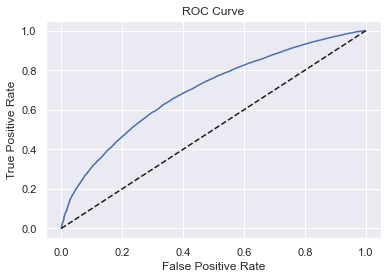

In [120]:
plt.plot(false_p_rt, true_p_rt)
plt.plot(false_p_rt, false_p_rt, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [121]:
thresholds

array([1.98934401, 0.98934401, 0.98653415, ..., 0.40598316, 0.37188173,
       0.35747919])

In [122]:
thresholds.shape

(17356,)

In [123]:
# new df with data for selecting cutoffs
df_cutoff = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(false_p_rt), pd.DataFrame(true_p_rt)], axis = 1)

In [125]:
df_cutoff.columns = ['thresholds', 'false_p_rt', 'true_p_rt']

In [126]:
df_cutoff.head()

,thresholds,false_p_rt,true_p_rt
0,1.989344,0.000000,0.000000
1,0.989344,0.000000,0.000012
2,0.986534,0.000000,0.000674
3,0.986512,0.000098,0.000674
4,0.985961,0.000098,0.000987


the roc curve method sets the first thresholf where nothing is being predicted to the max probability score from the supplied data + 1.
We can drop the first row or set the threshold to the max probability which is very close to 1.

In [128]:
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.
df_cutoff['thresholds'][0] = 1 - 1 / np.power(10, 16)

common way to set cutoffs: estimated prob to be good, through credit score as there is a 1:1 correspondence between credit scores and probabilities

In [129]:
df_cutoff['Score'] = ((np.log(df_cutoff['thresholds'] / (1 - df_cutoff['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [130]:
df_cutoff.head()

,thresholds,false_p_rt,true_p_rt,Score
0,1.000000,0.000000,0.000000,3377.0
1,0.989344,0.000000,0.000012,794.0
2,0.986534,0.000000,0.000674,775.0
3,0.986512,0.000098,0.000674,775.0
4,0.985961,0.000098,0.000987,772.0


In [132]:
df_cutoff['Score'][0] = max_score

In [133]:
df_cutoff.head()

,thresholds,false_p_rt,true_p_rt,Score
0,1.000000,0.000000,0.000000,850.0
1,0.989344,0.000000,0.000012,794.0
2,0.986534,0.000000,0.000674,775.0
3,0.986512,0.000098,0.000674,775.0
4,0.985961,0.000098,0.000987,772.0


In [134]:
df_cutoff.tail()

,thresholds,false_p_rt,true_p_rt,Score
17351,0.472105,0.999607,0.999976,422.0
17352,0.418905,0.999902,0.999976,405.0
17353,0.405983,0.999902,0.999988,400.0
17354,0.371882,1.000000,0.999988,389.0
17355,0.357479,1.000000,1.000000,384.0


In [139]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_pred_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [140]:
df_cutoff['N Approved'] = df_cutoff['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoff['N Rejected'] = df_pred_probs['y_hat_test_proba'].shape[0] - df_cutoff['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoff['Approval Rate'] = df_cutoff['N Approved'] / df_pred_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoff['Rejection Rate'] = 1 - df_cutoff['Approval Rate']
# Rejection rate equals one minus approval rate.

In [141]:
df_cutoff.head()

,thresholds,false_p_rt,true_p_rt,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.989344,0.000000,0.000012,794.0,1,93256,0.000011,0.999989
2,0.986534,0.000000,0.000674,775.0,56,93201,0.000600,0.999400
3,0.986512,0.000098,0.000674,775.0,57,93200,0.000611,0.999389
4,0.985961,0.000098,0.000987,772.0,83,93174,0.000890,0.999110


In [142]:
df_cutoff.tail()

,thresholds,false_p_rt,true_p_rt,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17351,0.472105,0.999607,0.999976,422.0,93251,6,0.999936,0.000064
17352,0.418905,0.999902,0.999976,405.0,93254,3,0.999968,0.000032
17353,0.405983,0.999902,0.999988,400.0,93255,2,0.999979,0.000021
17354,0.371882,1.000000,0.999988,389.0,93256,1,0.999989,0.000011
17355,0.357479,1.000000,1.000000,384.0,93257,0,1.000000,0.000000


In [144]:
df_cutoff.iloc[5000: 6200, ]

,thresholds,false_p_rt,true_p_rt,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.903852,0.258391,0.539733,611.0,47467,45790,0.508991,0.491009
5001,0.903827,0.258391,0.539853,611.0,47477,45780,0.509099,0.490901
5002,0.903826,0.258489,0.539853,611.0,47478,45779,0.509109,0.490891
5003,0.903820,0.258489,0.539877,611.0,47480,45777,0.509131,0.490869
5004,0.903817,0.258685,0.539877,611.0,47482,45775,0.509152,0.490848
5005,0.903808,0.258685,0.539950,611.0,47488,45769,0.509216,0.490784
5006,0.903806,0.258783,0.539950,611.0,47489,45768,0.509227,0.490773
5007,0.903802,0.258783,0.539962,611.0,47490,45767,0.509238,0.490762
5008,0.903800,0.258881,0.539962,611.0,47491,45766,0.509249,0.490751
5009,0.903782,0.258881,0.540118,611.0,47504,45753,0.509388,0.490612


In [145]:
df_cutoff.iloc[1000: 2000, ]

,thresholds,false_p_rt,true_p_rt,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.952369,0.048086,0.199574,671.0,17068,76189,0.183021,0.816979
1001,0.952354,0.048086,0.199718,671.0,17080,76177,0.183150,0.816850
1002,0.952353,0.048184,0.199718,671.0,17081,76176,0.183161,0.816839
1003,0.952321,0.048184,0.199827,671.0,17090,76167,0.183257,0.816743
1004,0.952320,0.048283,0.199827,671.0,17091,76166,0.183268,0.816732
1005,0.952291,0.048283,0.199959,671.0,17102,76155,0.183386,0.816614
1006,0.952290,0.048381,0.199959,671.0,17103,76154,0.183396,0.816604
1007,0.952284,0.048381,0.200067,671.0,17112,76145,0.183493,0.816507
1008,0.952284,0.048479,0.200067,671.0,17113,76144,0.183504,0.816496
1009,0.952245,0.048479,0.200332,671.0,17135,76122,0.183740,0.816260


In [146]:
df_scorecard.to_csv('df_scorecard.csv')

In [147]:
inputs_test_ref_cat.to_csv('inputs_train_with_ref_cat.csv')